In [1]:
!pip install pyod
!pip install scikit-learn
!pip install pandas
!pip install numpy
!pip install suod
!pip install matplotlib

  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 2.8/2.8 MB 23.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/30.3 MB ? eta -:--:--
   ----------- ---------------------------- 8.9/30.3 MB 39.5 MB/s eta 0:00:01
   ------------------------ --------------- 18.4/30.3 MB 41.4 MB/s eta 0:00:01
   ------------------------------------ --- 28.0/30.3 MB 43.4 MB/s eta 0:00:01
   ---------------------------------------- 30.3/30.3 MB 39.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ------------------------------- -------- 10.0/12.6 MB 47.8 MB/s eta 0:00:01
   ---------------------------------------- 1

In [2]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split

file = "../results/processed_data/opcua_undersampled.csv"
data = pd.read_csv(file)

# eliminar las columnas que no son numéricas
# data = data.select_dtypes(include=["float64", "int64", "int32"])

# quitar las ultimas 2 columnas
# data = data.iloc[:, :-1]
data

,src_port,dst_port,pktTotalCount,octetTotalCount,avg_ps,service_errors,status_errors,msg_size,min_msg_size,count,srv_count,same_srv_rate,dst_host_same_src_port_rate,f_pktTotalCount,f_octetTotalCount,f_rate,b_pktTotalCount,b_octetTotalCount,label
0,1.206194,-0.003048,1.477705,1.479068,1.476717,0,0,1.476746,1.482711,-1.243593,-1.243602,0.028222,0.028427,-0.003048,1.457174,1.480937,1.485845,1.483265,0
1,0.566946,-0.003048,1.477705,1.479068,1.476717,0,0,1.476746,1.482711,-1.210500,-1.210510,0.028222,0.028427,-0.003048,1.457174,1.480937,1.485845,1.483265,0
2,0.566946,-0.003048,1.477705,1.479068,1.476717,0,0,1.476746,1.482711,-1.210500,-1.210510,0.028222,0.028427,-0.003048,1.457174,1.480937,1.485845,1.483265,0
3,0.513411,-0.003048,1.477705,1.479068,1.476717,0,0,1.476746,1.482711,-1.210500,-1.210510,0.028222,0.028427,-0.003048,1.457174,1.480937,1.485845,1.483265,0
4,1.268722,-0.003048,1.477705,1.479068,1.476717,0,0,1.476746,1.482711,-1.210500,-1.210510,0.028222,0.028427,-0.003048,1.457174,1.480937,1.485845,1.483265,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67127,-1.376190,-0.003048,-0.669760,-0.670657,-0.670858,0,0,-0.669710,-0.670404,0.841241,0.841207,0.028222,0.028427,-0.003048,-0.663343,-0.673385,-0.673012,-0.670741,1
67128,-0.845652,-0.003048,-0.669760,-0.670657,-0.670858,0,0,-0.669710,-0.670404,0.760348,0.760315,0.028222,0.028427,-0.003048,-0.663343,-0.673385,-0.673012,-0.670741,1
67129,-1.283879,-0.003048,-0.669760,-0.670657,-0.670858,0,0,-0.669710,-0.670404,0.822856,0.822823,0.028222,0.028427,-0.003048,-0.663343,-0.673385,-0.673012,-0.670741,1
67130,-0.659549,-0.003048,-0.669760,-0.670657,-0.670858,0,0,-0.669710,-0.670404,0.738286,0.738254,0.028222,0.028427,-0.003048,-0.663343,-0.673385,-0.673012,-0.670741,1


In [42]:
data.describe()

,src_port,dst_port,pktTotalCount,octetTotalCount,avg_ps,service_errors,status_errors,msg_size,min_msg_size,count,srv_count,same_srv_rate,dst_host_same_src_port_rate,f_pktTotalCount,f_octetTotalCount,f_rate,b_pktTotalCount,b_octetTotalCount,label
count,67132.000000,67132.000000,67132.000000,67132.000000,67132.000000,67132.0,67132.0,67132.000000,67132.000000,67132.000000,67132.000000,67132.000000,67132.000000,67132.000000,67132.000000,67132.000000,67132.000000,67132.000000,67132.000000
mean,0.169321,0.001839,0.404069,0.404124,0.403315,0.0,0.0,0.403366,0.402401,-0.333420,-0.333402,-0.017027,-0.017150,0.001839,0.399019,0.405059,0.406031,0.404661,0.500000
std,0.923799,1.266216,1.081391,1.081091,1.080055,0.0,0.0,1.081616,1.078630,1.019779,1.019798,1.265916,1.265911,1.266216,1.084927,1.078916,1.079436,1.080802,0.500004
min,-1.833936,-0.003048,-0.669760,-0.670657,-0.670858,0.0,0.0,-0.669710,-0.804974,-1.302424,-1.302433,-35.533957,-35.306805,-0.003048,-0.663343,-0.673385,-0.673012,-0.670741,0.000000
25%,-0.317614,-0.003048,-0.669760,-0.670657,-0.670858,0.0,0.0,-0.669710,-0.670404,-1.239916,-1.239925,0.028222,0.028427,-0.003048,-0.663343,-0.673385,-0.673012,-0.670741,0.000000
50%,0.325191,-0.003048,-0.669760,0.376645,0.868046,0.0,0.0,0.486074,0.877148,-1.210500,-1.210510,0.028222,0.028427,-0.003048,0.788543,0.801646,-0.673012,-0.670741,0.500000
75%,0.790410,-0.003048,1.477705,1.479068,1.476717,0.0,0.0,1.476746,1.482711,0.797117,0.797084,0.028222,0.028427,-0.003048,1.457174,1.480937,1.485845,1.483265,1.000000
max,1.632676,328.071639,33.689684,24.748062,8.619989,0.0,0.0,23.106420,7.403779,3.168753,3.168693,0.028222,0.028427,328.071639,57.908778,4.217508,1.485845,7.878800,1.000000


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67132 entries, 0 to 67131
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   src_port                     67132 non-null  float64
 1   dst_port                     67132 non-null  float64
 2   pktTotalCount                67132 non-null  float64
 3   octetTotalCount              67132 non-null  float64
 4   avg_ps                       67132 non-null  float64
 5   service_errors               67132 non-null  int64  
 6   status_errors                67132 non-null  int64  
 7   msg_size                     67132 non-null  float64
 8   min_msg_size                 67132 non-null  float64
 9   count                        67132 non-null  float64
 10  srv_count                    67132 non-null  float64
 11  same_srv_rate                67132 non-null  float64
 12  dst_host_same_src_port_rate  67132 non-null  float64
 13  f_pktTotalCount 

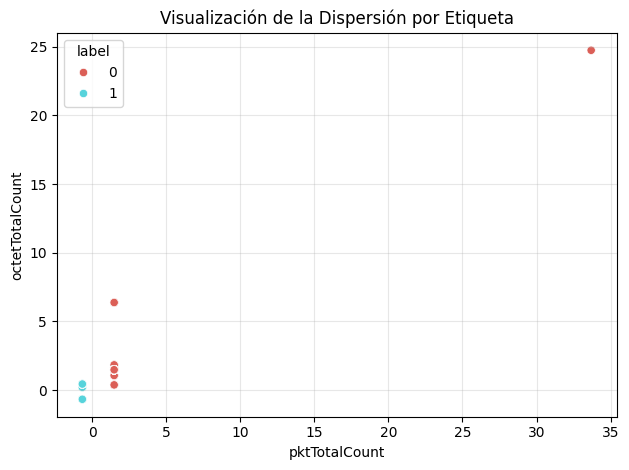

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que 'data' es tu DataFrame con las características y etiquetas
# Ejemplo de cómo debería estar estructurado:
# data = pd.DataFrame({
#     'feature1': [...],  # Valores numéricos
#     'feature2': [...],  # Valores numéricos
#     'label': [...]      # Etiquetas categóricas
# })

# Gráfico de dispersión mejorado
sns.scatterplot(
    x=data.columns[2],  # Primera característica
    y=data.columns[3],  # Segunda característica
    hue="label",  # Variable de coloración
    data=data,
    palette="hls",
    legend="full",
)
plt.title("Visualización de la Dispersión por Etiqueta")
plt.xlabel(data.columns[2])  # Nombre de la primera característica
plt.ylabel(data.columns[3])  # Nombre de la segunda característica
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [45]:
import numpy as np

# Separar features (X) y target (y)
X = data.drop(columns=["label"])
y = data["label"]

# Dividir en train (80%) y test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,            # 20% para test
    random_state=42,          # semilla para reproducibilidad
    stratify=y                # mantiene proporción de clases
)

# Verificación de tamaños
print(f"\nTotal muestras: {len(X)}")
print(f"Train: {len(X_train)} muestras ({len(X_train)/len(X):.0%})")
print(f"Test: {len(X_test)} muestras ({len(X_test)/len(X):.0%})")

# Verificación distribución de clases (si es clasificación)
if len(y.unique()) > 1:
    print("\nDistribución de clases:")
    print(f"Train - {dict(zip(*np.unique(y_train, return_counts=True)))}")
    print(f"Test - {dict(zip(*np.unique(y_test, return_counts=True)))}")


Total muestras: 67132
Train: 53705 muestras (80%)
Test: 13427 muestras (20%)

Distribución de clases:
Train - {np.int64(0): np.int64(26852), np.int64(1): np.int64(26853)}
Test - {np.int64(0): np.int64(6714), np.int64(1): np.int64(6713)}


In [46]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (53705, 18)
X_test shape: (13427, 18)


## Entrenamiento aplicando SUOD para automatizar entrenamientos de varios modelos

In [47]:
from pyod.models.lof import LOF
from pyod.models.copod import COPOD
from pyod.models.cblof import CBLOF
from pyod.models.iforest import IForest
from pyod.models.suod import SUOD
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# 1. Preparación de datos
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Modelos base (incluyendo COPOD)
detector_list = [
    COPOD(contamination=0.1),
    LOF(n_neighbors=15, contamination=0.1),
    LOF(n_neighbors=40, contamination=0.1),
    CBLOF(n_clusters=6, alpha=0.85, contamination=0.1),
    IForest(n_estimators=300, max_features=0.8, contamination=0.1),
    IForest(n_estimators=150, max_samples=0.6, contamination=0.1)
]

# 3. SUOD configurado
suod_clf = SUOD(
    base_estimators=detector_list,
    n_jobs=4,
    combination='average',
    contamination=0.1,
    rp_flag_global=True,
    bps_flag=True,
    verbose=True
)

# 4. Entrenamiento
print("Entrenando ensemble SUOD...")
suod_clf.fit(X_train_scaled)

from sklearn.base import clone

individual_scores = []

for model in suod_clf.base_estimators:
    model_clone = clone(model)             # Copia limpia del modelo original
    model_clone.fit(X_train_scaled)        # Entrenamiento manual
    scores = model_clone.decision_function(X_test_scaled)  # Ahora sí funciona
    individual_scores.append(scores)


# 5. Predicciones del ensemble
test_scores = suod_clf.decision_function(X_test_scaled)
test_pred = suod_clf.predict(X_test_scaled)


Entrenando ensemble SUOD...
RandomForestRegressor()
Worker 1 sum of ranks: 3.75
Worker 2 sum of ranks: 3.25
Worker 3 sum of ranks: 2.5
Worker 4 sum of ranks: 0.0

Split among workers BPS: [0, 2, 4, 6, 6] [2, 2, 2, 0]
Parallel Training...


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    1.4s remaining:    1.4s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    6.0s finished


Balanced Scheduling Total Train Time: 7.167548179626465
Split among workers default: [2 4 5 6] [np.int64(2), np.int64(1), np.int64(1)]


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   40.1s finished


Worker 1 sum of ranks: 3.75
Worker 2 sum of ranks: 2.916666666666667
Worker 3 sum of ranks: 2.8333333333333335
Worker 4 sum of ranks: 0.0

Split among workers BPS: [0, 2, 4, 6, 6] [2, 2, 2, 0]
Parallel score prediction...


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    1.1s remaining:    1.1s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    1.8s finished


Parallel Score Prediction without Approximators Total Time: 3.1019785404205322
Worker 1 sum of ranks: 3.75
Worker 2 sum of ranks: 2.916666666666667
Worker 3 sum of ranks: 2.8333333333333335
Worker 4 sum of ranks: 0.0

Split among workers BPS: [0, 2, 4, 6, 6] [2, 2, 2, 0]
Parallel score prediction...


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    1.0s remaining:    1.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    1.8s finished


Parallel Score Prediction without Approximators Total Time: 3.0752222537994385



📊 Métricas de evaluación:
ROC AUC         : 0.5683
Average Precision (AUCPR): 0.5621
F1-score        : 0.2380
Precisión       : 0.6803
Recall          : 0.1442


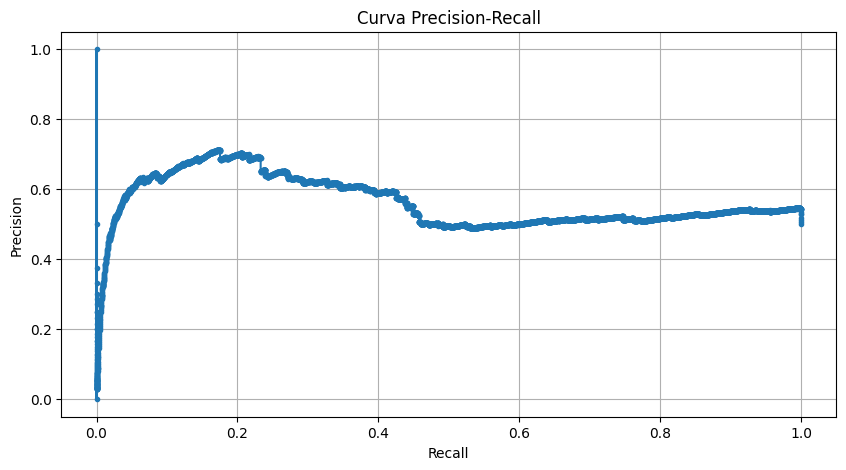

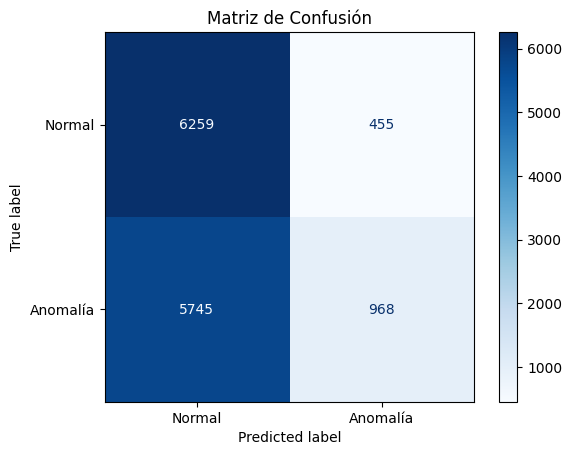

In [48]:
from sklearn.metrics import (
    roc_auc_score, precision_recall_curve, 
    average_precision_score, f1_score, 
    precision_score, recall_score, 
    confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

def evaluate_model(y_true, scores, y_pred):
    auc = roc_auc_score(y_true, scores)
    ap = average_precision_score(y_true, scores)
    f1 = f1_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)

    print(f"\n📊 Métricas de evaluación:")
    print(f"ROC AUC         : {auc:.4f}")
    print(f"Average Precision (AUCPR): {ap:.4f}")
    print(f"F1-score        : {f1:.4f}")
    print(f"Precisión       : {prec:.4f}")
    print(f"Recall          : {rec:.4f}")

    # Curva Precision-Recall
    precision_curve, recall_curve, _ = precision_recall_curve(y_true, scores)
    plt.figure(figsize=(10, 5))
    plt.plot(recall_curve, precision_curve, marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Curva Precision-Recall')
    plt.grid(True)
    plt.show()

    # Matriz de Confusión
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Anomalía"])
    disp.plot(cmap="Blues", values_format="d")
    plt.title("Matriz de Confusión")
    plt.grid(False)
    plt.show()

    return auc, ap, f1, prec, rec

# Evaluación del ensemble
auc, ap, f1, prec, rec = evaluate_model(y_test, test_scores, test_pred)


In [49]:
from sklearn.metrics import roc_auc_score, average_precision_score, f1_score

print("\n📊 Evaluación de modelos reentrenados:")
for model, scores in zip(suod_clf.base_estimators, individual_scores):
    name = model.__class__.__name__
    try:
        preds = (scores > 0.5).astype(int)  # Umbral fijo o puedes usar el de SUOD
        auc = roc_auc_score(y_test, scores)
        ap = average_precision_score(y_test, scores)
        f1 = f1_score(y_test, preds)
        print(f"{name:<20} | ROC AUC: {auc:.4f} | AUCPR: {ap:.4f} | F1: {f1:.4f}")
    except Exception as e:
        print(f"❌ Error evaluando {name}: {e}")



📊 Evaluación de modelos reentrenados:
COPOD                | ROC AUC: 0.1759 | AUCPR: 0.3787 | F1: 0.6666
LOF                  | ROC AUC: 0.6042 | AUCPR: 0.6697 | F1: 0.6666
LOF                  | ROC AUC: 0.5678 | AUCPR: 0.5851 | F1: 0.6666
CBLOF                | ROC AUC: 0.5496 | AUCPR: 0.5562 | F1: 0.4484
IForest              | ROC AUC: 0.5120 | AUCPR: 0.5291 | F1: 0.0000
IForest              | ROC AUC: 0.9302 | AUCPR: 0.8623 | F1: 0.0000



Visualización de anomalías detectadas:
Varianza explicada por PCA: [0.49242408 0.3703906 ]


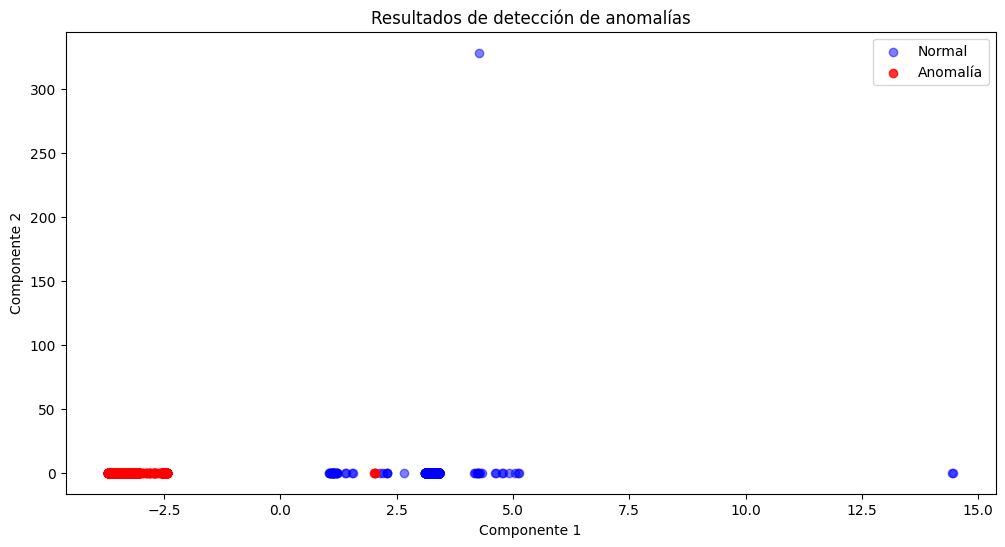


✅ Modelo guardado como 'suod_model.joblib'


In [50]:
from sklearn.decomposition import PCA
from joblib import dump

# 8. Visualización PCA
def plot_results(X, scores, y_true=None):
    if X.shape[1] > 2:
        pca = PCA(n_components=2)
        X_plot = pca.fit_transform(X)
        print(f"Varianza explicada por PCA: {pca.explained_variance_ratio_}")
    else:
        X_plot = X

    plt.figure(figsize=(12, 6))
    if y_true is not None:
        normal = X_plot[y_true == 0]
        anomalies = X_plot[y_true == 1]
        plt.scatter(normal[:, 0], normal[:, 1], c='blue', alpha=0.5, label='Normal')
        plt.scatter(anomalies[:, 0], anomalies[:, 1], c='red', alpha=0.8, label='Anomalía')
        plt.legend()
    else:
        scatter = plt.scatter(X_plot[:, 0], X_plot[:, 1], c=scores, cmap='coolwarm', alpha=0.6)
        plt.colorbar(scatter, label='Score de anomalía')

    plt.title('Resultados de detección de anomalías')
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.show()

print("\nVisualización de anomalías detectadas:")
plot_results(X_test_scaled, test_scores, y_test)

# 9. Guardar modelo
dump(suod_clf, 'suod_model.joblib')
print("\n✅ Modelo guardado como 'suod_model.joblib'")